In [112]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
# Importing the required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

In [113]:
h_data = pd.read_csv("D:/CVcourse/housing_cost/Chennai_housing_sale.csv")
h_data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [114]:
h_data.describe(include='all')


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,...,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,2798,NaN,NaN,NaN,NaN,9,3,...,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,P03210,Chrompet,NaN,06-10-2009,NaN,NaN,NaN,NaN,AdjLand,Yes,...,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,12,NaN,NaN,NaN,NaN,1433,3587,...,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,NaN,99.603179,1.637029,1.213260,3.688704,NaN,NaN,...,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,NaN,57.403110,0.802902,0.409639,1.019099,NaN,NaN,...,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,NaN,0.000000,1.000000,1.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,NaN,50.000000,1.000000,1.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,NaN,99.000000,1.000000,1.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,NaN,148.000000,2.000000,1.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07


In [115]:
h_data.shape


(7109, 22)

In [116]:
h_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [117]:
h_data.isnull().sum()


PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [118]:
h_data.nunique()


PRT_ID           7109
AREA               17
INT_SQFT         1699
DATE_SALE        2798
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
DATE_BUILD       5808
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        479
REG_FEE          7038
COMMIS           7011
SALES_PRICE      7057
dtype: int64

In [119]:
h_data.N_BEDROOM.value_counts()


1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [120]:
h_data.N_BATHROOM.value_counts()


1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [121]:
df_missing=pd.DataFrame((round(100*(h_data.isnull().sum()/len(h_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
QS_OVERALL,0.68
N_BATHROOM,0.07
N_BEDROOM,0.01
PRT_ID,0.00
UTILITY_AVAIL,0.00
COMMIS,0.00
REG_FEE,0.00
QS_BEDROOM,0.00
QS_BATHROOM,0.00
QS_ROOMS,0.00


In [122]:
h_data['QS_OVERALL'] = h_data['QS_OVERALL'].fillna('No_QS')
h_data['N_BATHROOM'] = h_data['N_BATHROOM'].fillna('No_BATHROOM')
h_data['N_BEDROOM'] = h_data['N_BEDROOM'].fillna('No_BEDROOM')

In [123]:
h_data.drop("QS_OVERALL",axis = 1, inplace=True)

In [124]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   object 
 6   N_BATHROOM     7109 non-null   object 
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  REG_FEE 

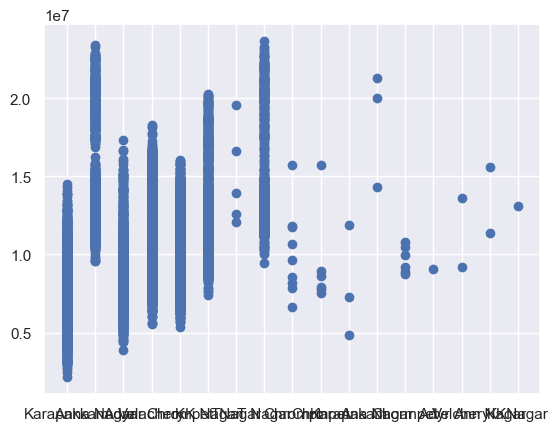

In [125]:
plt.scatter(h_data.AREA,h_data.SALES_PRICE)

<Axes: xlabel='SALES_PRICE', ylabel='Density'>

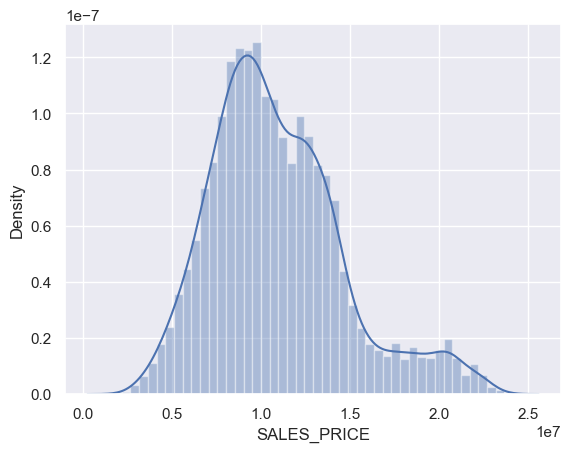

In [126]:
sns.distplot(h_data['SALES_PRICE'])


In [127]:
print("Skewness: %f" % h_data['SALES_PRICE'].skew())
print("Kurtosis: %f" % h_data['SALES_PRICE'].kurt())

Skewness: 0.773343
Kurtosis: 0.588129


Text(0.5, 1.0, 'N_BEDROOM')

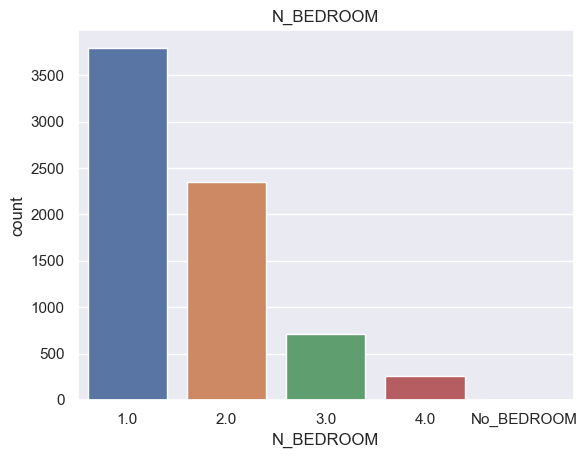

In [128]:
sns.countplot(x='N_BEDROOM', data= h_data)
plt.title('N_BEDROOM')

In [129]:
# for col in ('N_BEDROOM','N_BATHROOM'):
#     h_data[col] = h_data[col].fillna(0)
h_data['N_BEDROOM'].replace('No_BEDROOM', np.nan, inplace=True)
h_data['N_BEDROOM'] = pd.to_numeric(h_data['N_BEDROOM'])
h_data.dropna(subset=['N_BEDROOM'], inplace=True)
print(h_data['N_BEDROOM'].unique())
h_data['DIST_MAINROAD'] = h_data['DIST_MAINROAD'].astype(int)

[1. 2. 3. 4.]


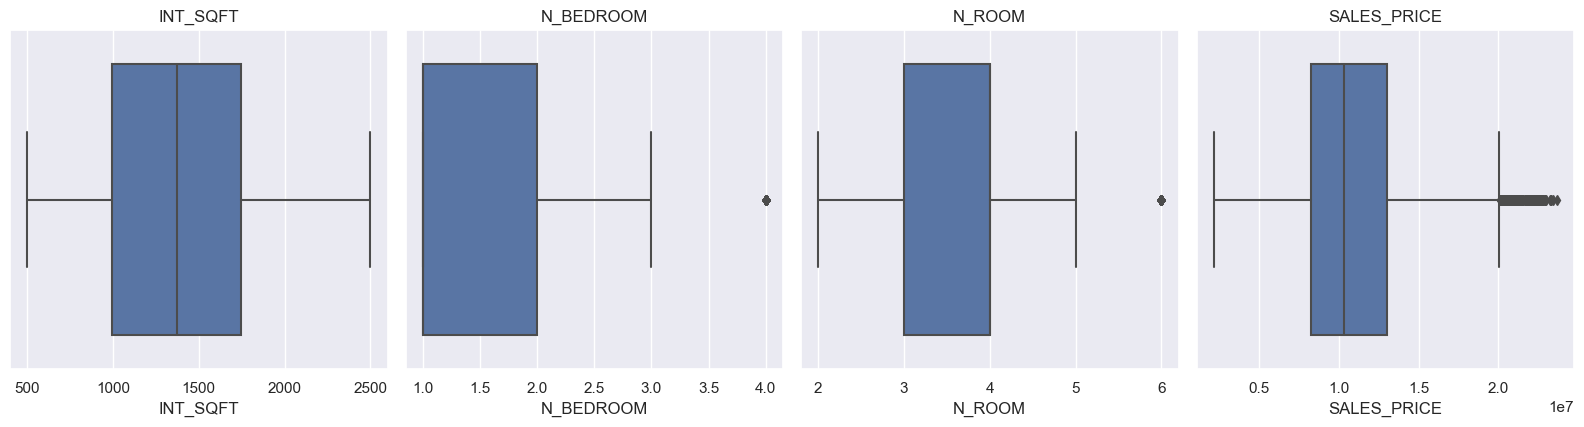

In [130]:
columns_to_analyze = ['INT_SQFT','N_BEDROOM','N_ROOM','SALES_PRICE']

plt.figure(figsize=(16, 8))

for i, column in enumerate(columns_to_analyze):
    plt.subplot(2, 4, i + 1)
    if h_data[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=h_data[column])  
        plt.title(column)
        plt.tight_layout()
    else:
        print(f"Skipping {column} as it contains non-numeric values")

plt.show()

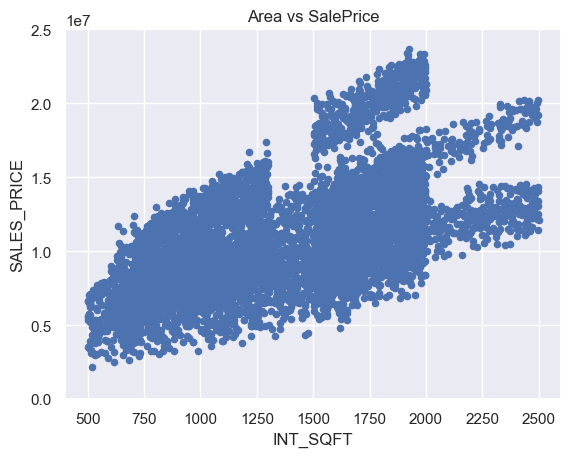

In [131]:
data = pd.concat([h_data['SALES_PRICE'], h_data['INT_SQFT']], axis=1)
data.isnull().sum()
# data.plot.scatter(x='INT_SQFT', y='SALES_PRICE', ylim=(0,800000));
# plt.title('SQFT vs SalePrice')
data.plot.scatter(x='INT_SQFT', y='SALES_PRICE', ylim=(0,25000000))
plt.title('Area vs SalePrice')
plt.show()


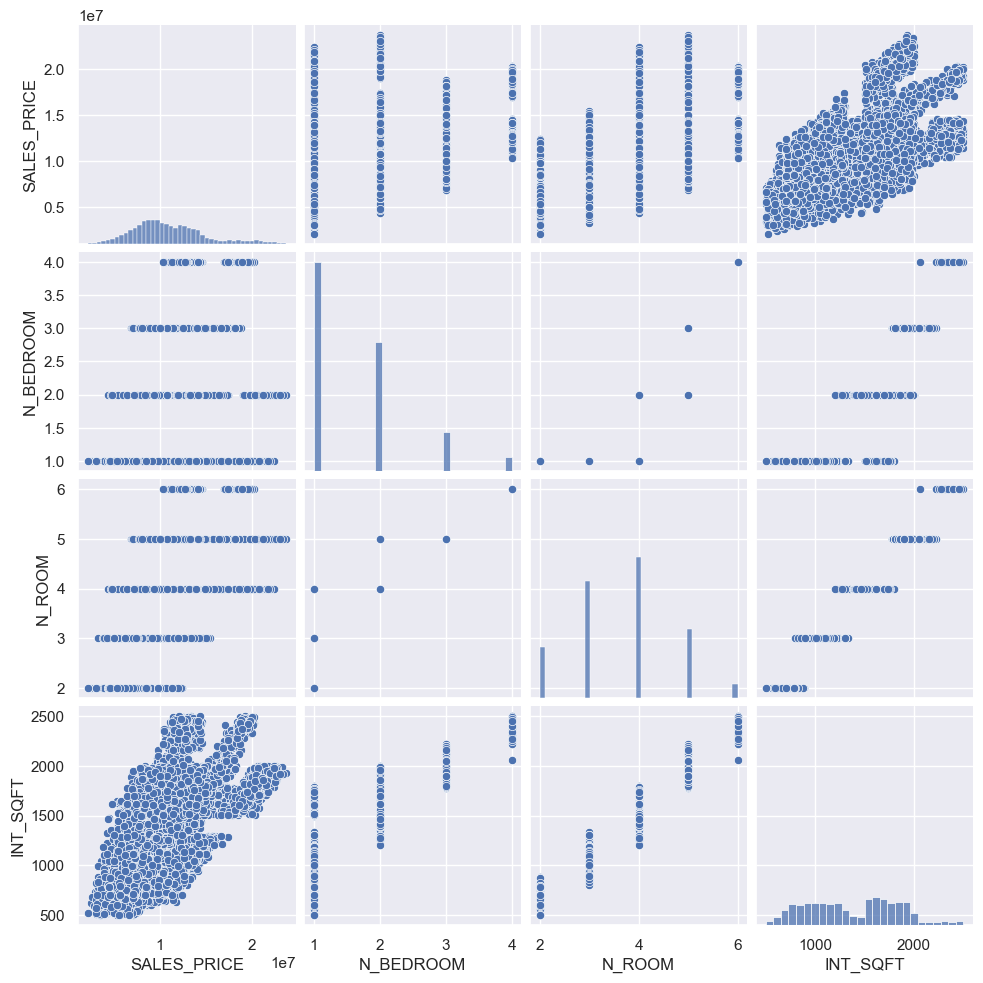

In [132]:
sns.set()
cols = ['SALES_PRICE', 'N_BEDROOM', 'N_ROOM', 'INT_SQFT']
sns.pairplot(h_data[cols], size = 2.5)
plt.show();

Text(0.5, 1.0, 'Checking Correlation matrix ')

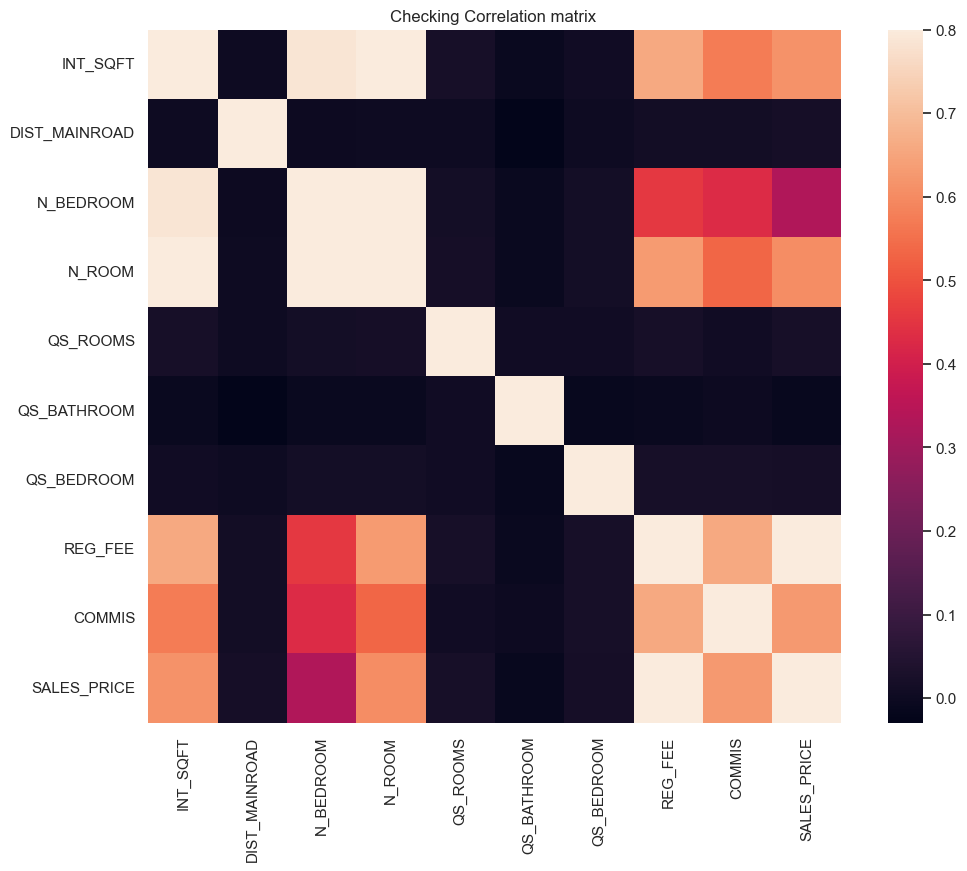

In [133]:
corrmat = h_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")

<Axes: xlabel='SALES_PRICE', ylabel='Density'>

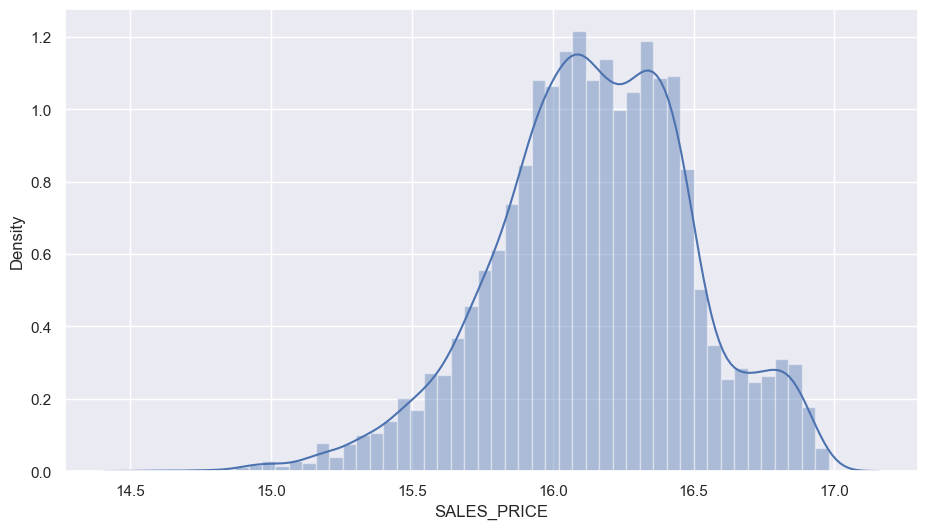

In [134]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(h_data["SALES_PRICE"]))

In [135]:
numeric_data = h_data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['INT_SQFT', 'N_BEDROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'REG_FEE', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [136]:
h_data['STREET'] = h_data['STREET'].apply(lambda x: 1 if x == 'Paved' else 0 )

h_data['PARK_FACIL'] = h_data['PARK_FACIL'].apply(lambda x : 1 if x == 'Yes' else 0)
                                                  
h_data['BUILDTYPE'] = h_data['BUILDTYPE'].apply(lambda x : 1 if x == 'House' else 0)    

In [137]:
cat_values = h_data.select_dtypes(include=['object'])
cat_values.head()

,PRT_ID,AREA,DATE_SALE,N_BATHROOM,SALE_COND,DATE_BUILD,UTILITY_AVAIL,MZZONE
0,P03210,Karapakkam,04-05-2011,1.0,AbNormal,15-05-1967,AllPub,A
1,P09411,Anna Nagar,19-12-2006,1.0,AbNormal,22-12-1995,AllPub,RH
2,P01812,Adyar,04-02-2012,1.0,AbNormal,09-02-1992,ELO,RL
3,P05346,Velachery,13-03-2010,2.0,Family,18-03-1988,NoSewr,I
4,P06210,Karapakkam,05-10-2009,1.0,AbNormal,13-10-1979,AllPub,C


In [138]:
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,PRT_ID_P00002,PRT_ID_P00004,PRT_ID_P00005,PRT_ID_P00006,PRT_ID_P00007,PRT_ID_P00009,PRT_ID_P00010,PRT_ID_P00011,PRT_ID_P00014,PRT_ID_P00015,...,DATE_BUILD_31-12-2002,UTILITY_AVAIL_AllPub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [139]:
cat_values = h_data.select_dtypes(include=['object'])
cat_values.columns

Index(['PRT_ID', 'AREA', 'DATE_SALE', 'N_BATHROOM', 'SALE_COND', 'DATE_BUILD',
       'UTILITY_AVAIL', 'MZZONE'],
      dtype='object')

In [140]:
df = h_data.drop(cat_values.columns, axis=1)

In [141]:
df = pd.concat([df,data_dummies], axis=1)

In [156]:
df.()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_ROOM,PARK_FACIL,BUILDTYPE,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,...,DATE_BUILD_31-12-2002,UTILITY_AVAIL_AllPub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
count,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,...,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000
mean,1382.048537,99.591728,1.637029,3.688661,0.504643,0.343697,0.360158,3.517290,3.507358,3.485509,...,0.000281,0.265335,0.214125,0.263225,0.257175,0.077378,0.073860,0.256331,0.261396,0.255487
std,457.438429,57.399027,0.802902,1.019164,0.500014,0.474975,0.480080,0.891905,0.897846,0.887154,...,0.016773,0.441542,0.410243,0.440414,0.437107,0.267208,0.261562,0.436637,0.439426,0.436165
min,500.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,993.000000,50.000000,1.000000,3.000000,0.000000,0.000000,0.000000,2.700000,2.700000,2.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1373.000000,99.000000,1.000000,4.000000,1.000000,0.000000,0.000000,3.500000,3.500000,3.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1744.000000,148.000000,2.000000,4.000000,1.000000,1.000000,1.000000,4.300000,4.300000,4.300000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2500.000000,200.000000,4.000000,6.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
y=h_data['SALES_PRICE']
X=df

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [152]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

1.0

In [154]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([1., 1., 1., 1., 1.])

In [157]:
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,1.000000,{'fit_intercept': True}
1,lasso,0.992909,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.999989,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [241]:
y_pred=lr_clf.predict(X_test)

In [244]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)
# y_pred=y_pred/1000000

In [245]:
result[['Price_actual','Price_pred']].sample(20)

,Price_actual,Price_pred
3535,8937450,8.937450
2002,6453250,6.453250
2335,10525805,10.525805
3515,12893440,12.893440
2546,21140330,21.140330
2426,10599680,10.599680
4574,7938700,7.938700
2125,8159260,8.159260
263,9153300,9.153300
1419,9845950,9.845950


In [246]:
alphas = [0.001, 0.01, 0.1, 1, 10]  # Example values, you can adjust as needed
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    # Evaluate model performance
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Alpha: {alpha}, Train R2: {train_r2}, Test R2: {test_r2}")

Alpha: 0.001, Train R2: 0.999999999998477, Test R2: 0.700169873059123
Alpha: 0.01, Train R2: 0.9999999998508403, Test R2: 0.7001882119800806
Alpha: 0.1, Train R2: 0.9999999920439739, Test R2: 0.763595033600267
Alpha: 1, Train R2: 0.9999985568760676, Test R2: 0.9165448473921158
Alpha: 10, Train R2: 0.9999999999999539, Test R2: 0.9999999999999537
